In [78]:
####C1B 模拟谱与实验刻度谱（Th228）比较，包括能谱和A/E分布：

#import ROOT
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import numpy as np
color_set=plt.get_cmap('tab10')

In [90]:
pic_path=r'E:\CDEX\C1B_0vbb\Energy_resolution\\'

#load text
#去除16383和inhibit事例
E_cali_filt_index=np.loadtxt(r"E:\CDEX\C1B\CODE\zbt\inhi_id.csv").astype(int)
E_cali_filt_index=E_cali_filt_index[E_cali_filt_index<3700000]
E_cali=(np.load(r"E:\CDEX\C1B\data\AOE\E_625.npy")[:,3]*0.19265-2.22)[E_cali_filt_index]
A_cali=np.load(r"E:\CDEX\C1B\data\AOE\A_625.npy")[E_cali_filt_index]
AOE_cali=A_cali[:,1]/E_cali


E_mc=np.loadtxt(r"E:\CDEX\C1B_0vbb\MC_Code\Th228_Calibrate_MC\Data\C1B_Cali_Th228_spectrum.csv")

In [65]:
def E_resolution(E):
    return 0.32231948+E*0.00047984
def poly(x,a,b,c):
    return a+b*x+c*x**2
def E_residual_correction(E):#可能适用于高能区，关注低能区时还是使用主放的刻度结果吧
    ##三个参数对应的标准差是1.36950620e-01 2.78530318e-04 9.60822919e-08
    residual=poly(E,-1.07813878e+00,  2.80900668e-03, -9.02120397e-07)
def Eff(range_,bins_):
    E,step=np.linspace(range_[0],range_[1],bins_,retstep=True)
    return 1-(E+step/2)/4710

#加能量分辨率
def Authenticity_Eresolution(E_mc):
    E_mc_authentic=np.zeros(E_mc.shape[0])
    E_mc_authentic=np.random.normal(loc=E_mc,scale=E_resolution(E_mc))+E_mc_authentic
    return E_mc_authentic

In [192]:
#两相比较
def compare(E_cali_,E_mc_,fontsize_=16,save_path=None):
    E_mc_authentic=Authenticity_Eresolution(E_mc_)
    
    #plot
    Dpi=600
    gs = GridSpec(2, 1, height_ratios=[7, 3])
    fig=plt.figure(figsize=(9,6),dpi=Dpi)
    # fig, ax = plt.subplots(1,2,gs,figsize=(9,6),dpi=Dpi,sharey=True)
    ax0=fig.add_subplot(gs[0])
    ax1=fig.add_subplot(gs[1])
    
    bins_=800
    range_=[200,2800]
    weights_=Eff(range_,bins_)
    mc_spec,bins=np.histogram(E_mc_authentic,bins=bins_, range=range_,density=False)
    #模拟能谱添加效率
    mc_spec=mc_spec*weights_
    ca_spec,bins=np.histogram(E_cali_,bins=bins_, range=range_,density=False)
    
    #
    frac_sigma=(ca_spec/ca_spec.sum())/(mc_spec/mc_spec.sum())*(1/ca_spec+1/mc_spec)**0.5

    mc_spec/=(mc_spec.sum()*(bins[1]-bins[0]))
    ca_spec=ca_spec*1.
    ca_spec/=(ca_spec.sum()*(bins[1]-bins[0]))
    frac_normalized=(ca_spec/mc_spec-1)/frac_sigma
    
    E_x=(bins[0:len(ca_spec)]+bins[1:])/2 #用于画图，x坐标
    
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    ax0.plot(E_x,mc_spec,label='Th228 Calibration')
    ax0.plot(E_x,ca_spec,label='Simulation')
    ax0.set_yscale('log')
    ax0.set_ylim(1e-6,1e-1)
    ax0.set_xlim(range_[0],range_[1])
    ax0.legend()
    
    ax1.set_ylim(-7,7)
    ax1.set_xlim(range_[0],range_[1])
    ax1.set_ylabel('Residual (${\sigma}$)',fontsize=fontsize_,fontfamily='Times New Roman')
    ax1.axhspan(-3,3,facecolor='0.5',alpha=0.5)
    ax1.axhspan(-5,5,facecolor='0.5',alpha=0.2)
    
    
    ax1.scatter(E_x,frac_normalized,s=14)
    plt.subplots_adjust(left=0.08, bottom=0.08, right=0.99, top=0.98,
                    wspace=0, hspace=0)
    ax1.set_xlabel('Energy (keV)',fontsize=fontsize_,fontfamily='Times New Roman')
    if(save_path):
        fig.savefig(save_path+'compare_mc_spec.svg',format='svg')
    
    

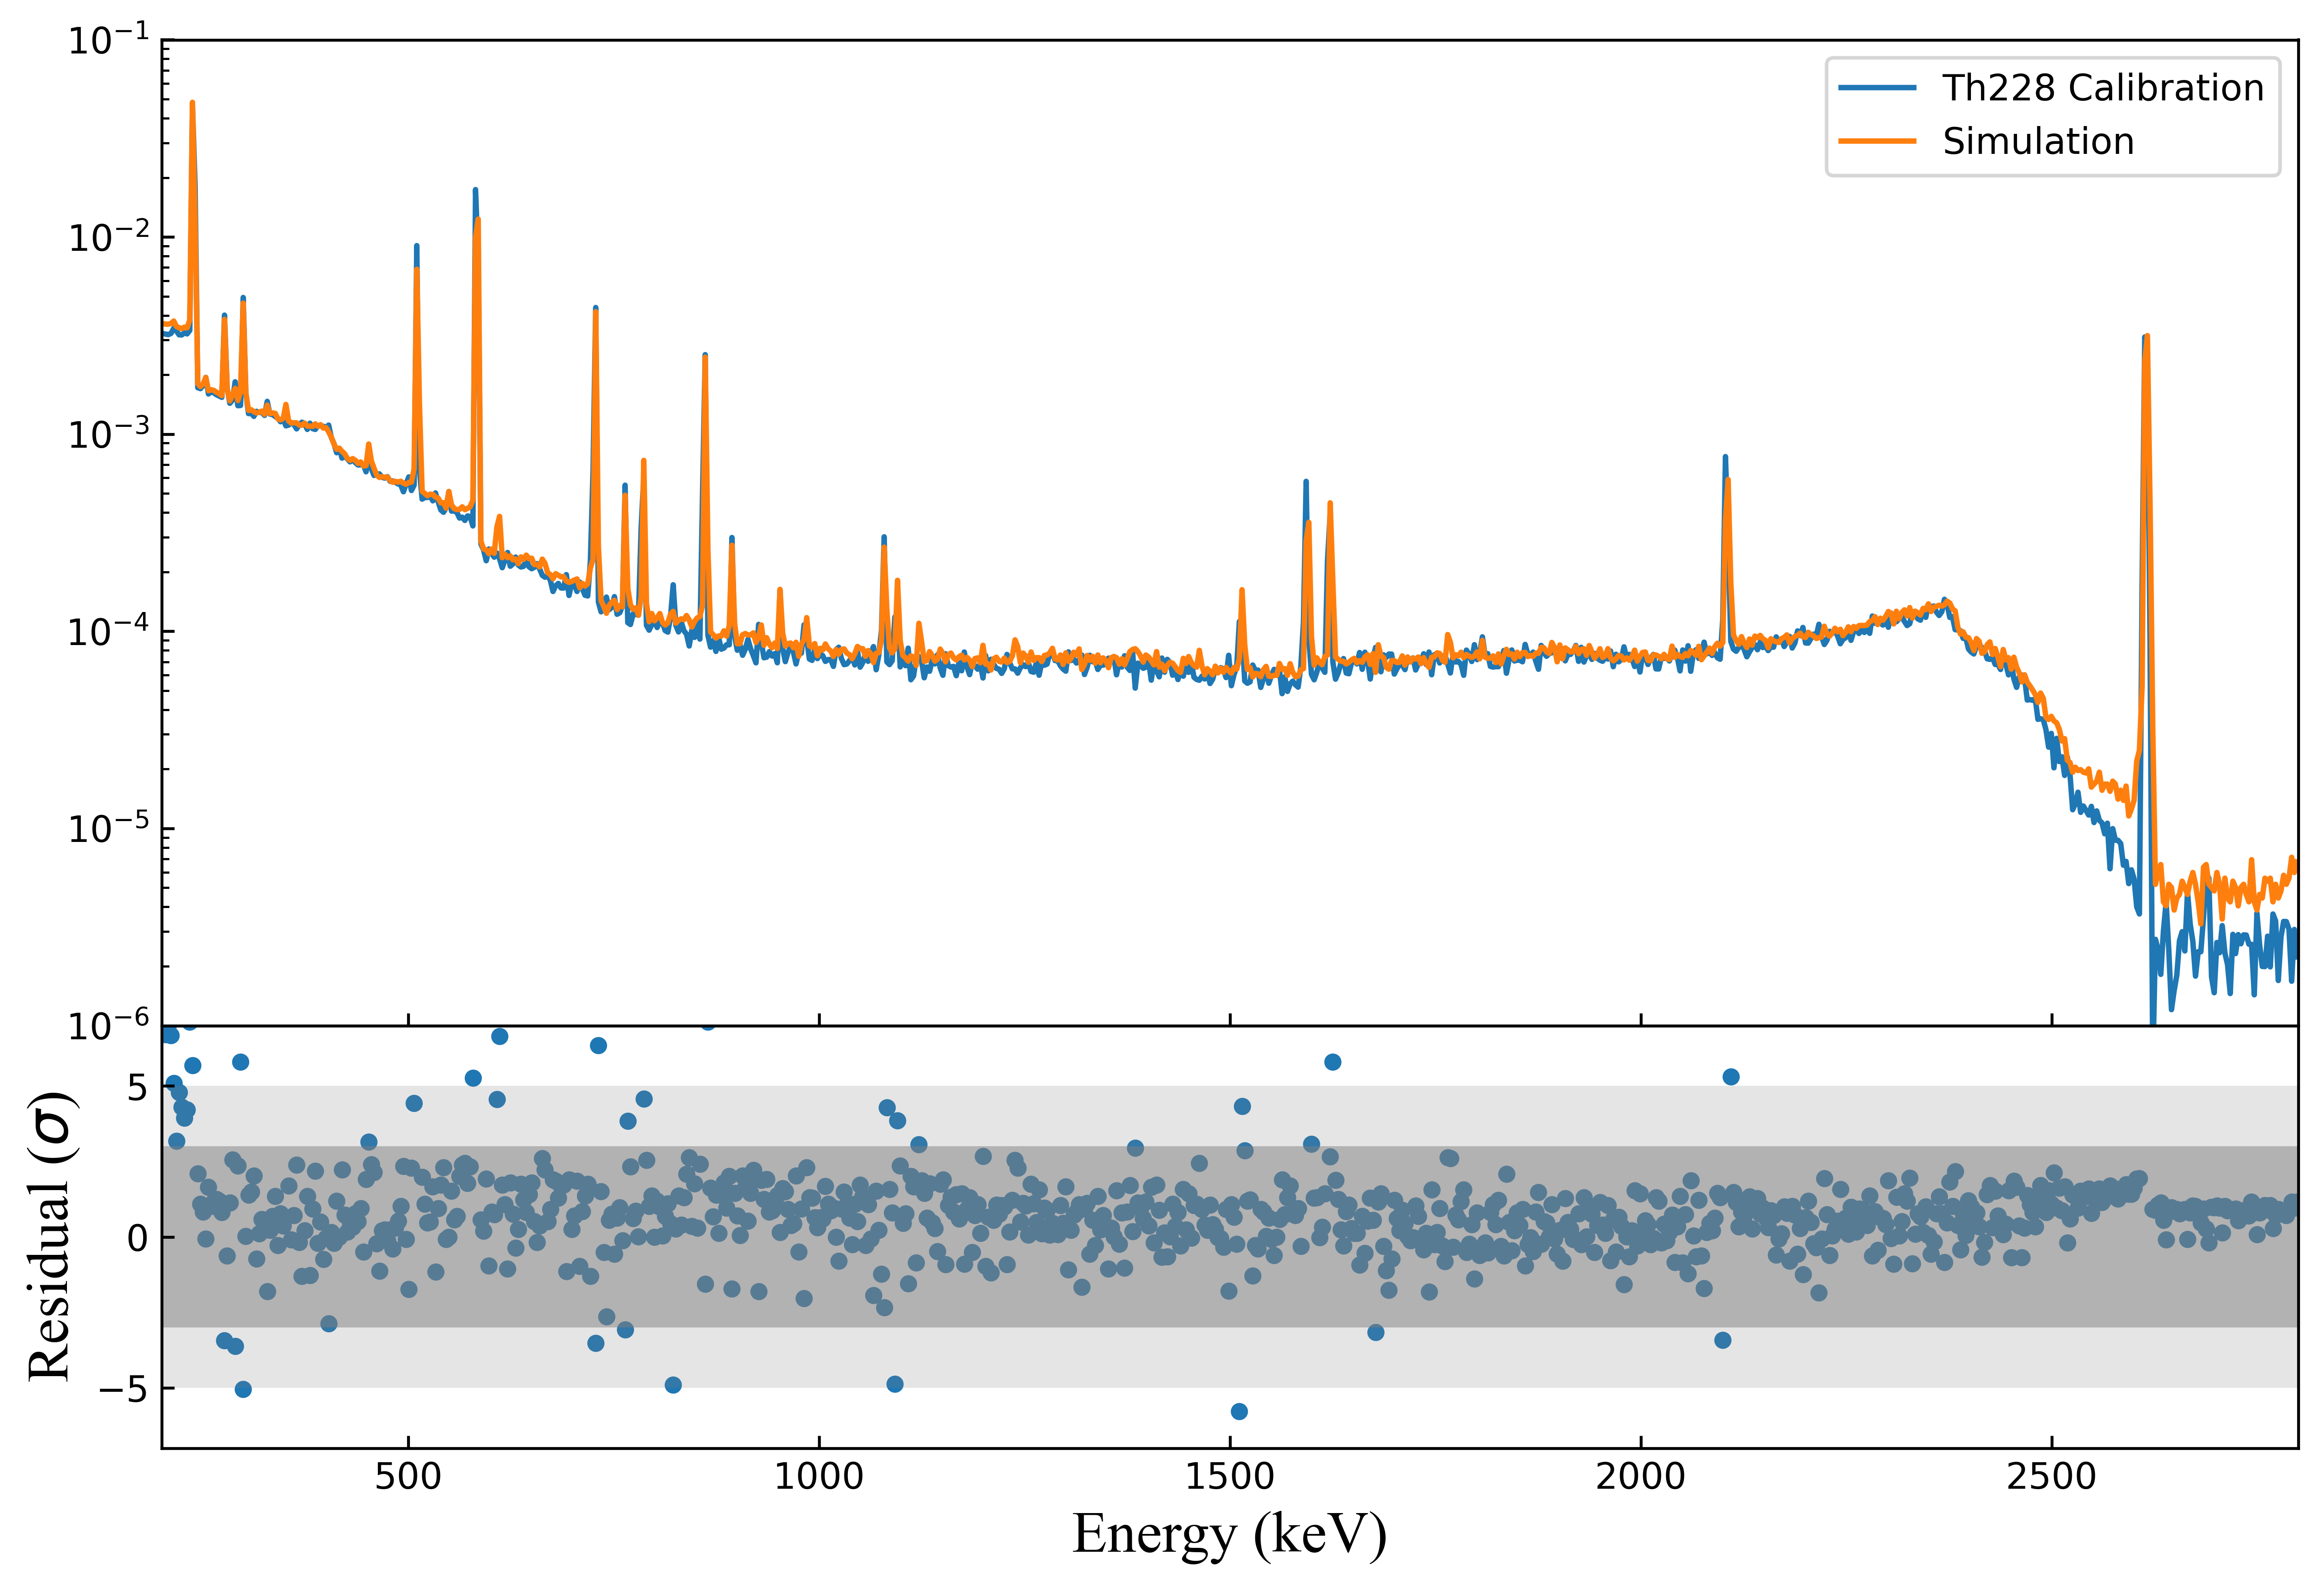

In [193]:
compare(E_cali,E_mc)